*Вероятность того, что стрелок попадет в мишень, выстрелив один раз, равна 0.8. Стрелок выстрелил 100 раз. Найдите вероятность того, что стрелок попадет в цель ровно 85 раз.*




Дано:
* $p(попадание) = 0.8$
* $n = 100$
* $k = 85$  

Найдем вероятность по формуле Бернулли:  

$ P_{100}(X=85)=C^{85}_{100}*p^{85}*(1-p)^{100-85} $

In [12]:
#Теперь уже использую встроенныю функцию питона для вычисления комбинаций
from math import comb as C
hit = 0.8
P1 = C(100,85) * hit**85 *(1-hit)**15
ans = P1
print(f"Ответ: вероятность равна {ans:.3f}")

Ответ: вероятность равна 0.048


---

*Вероятность того, что лампочка перегорит в течение первого дня эксплуатации, равна 0.0004. В жилом комплексе после ремонта в один день включили 5000 новых лампочек. Какова вероятность, что ни одна из них не перегорит в первый день? Какова вероятность, что перегорят ровно две?*

---


Дано:
* $p(перегорание) = 0.0004$ . Видим, что вероятность малая, поэтому пойдем по формуле Пуассона
* $n = 5000$
* $m1 = 0 ,m2 = 2$   

Решение:  

$ \lambda = p*n=0.0004*5000=2 $  

Запишем вероятность, что ни одна лампочка не перегорит($m_1 = 0$), по формуле Пуассона:  
$$ P_{0}=\frac{\lambda^0}{0!}*e^{-\lambda}=\frac{2^0}{1}*\frac{1}{2.72^2} = 0.135$$

Вероятность, что перегорят две лампочки($m_2 = 2$):
$$ P_{2}=\frac{\lambda^2}{2!}*e^{-\lambda}=\frac{2^2}{2}*\frac{1}{2.72^2} = 0.27 $$

---

*Монету подбросили 144 раза. Какова вероятность, что орел выпадет ровно 70 раз?*

---

Дано:
* $p(\text{орел}) =\frac{1}{2}= 0.5$
* $n = 144$ - всего раз подбросили монету
* $k = 70$ - сколько раз выпал орёл
* $q = 1-0.5=0.5$

Решение:  

Снова классическое биномиальное распределение, запишем формулу.

$ P_{144}(X=70)=C^{70}_{144}*p^{70}*q^{144-70} = 0.06281 $

In [13]:
tails = 0.5
P2 = C(144,70) * tails**70 *(1-tails)**74
ans = P2
print(f"Ответ: вероятность равна {ans:.5f}")

#Запишу и проверю питоновскую функцию для формулы Бернулли
def Bernulli_spread(n:int,k:int,p:float)->float:
    from math import comb as C
    return C(n,k) * (p**k) *(1-p)**(n-k)

P2_f = Bernulli_spread(144,70,0.5)
if P2_f == ans:
    print(f"Через мою функцию получилось {P2_f:.5f} , совпадает")
else:
    print(f"Через мою функцию получилось {P2_f} , НЕ совпадает")

Ответ: вероятность равна 0.06281
Через мою функцию получилось 0.06281 , совпадает


---

*В первом ящике находится 10 мячей, из которых 7 - белые. Во втором ящике - 11 мячей, из которых 9 белых. Из каждого ящика вытаскивают случайным образом по два мяча. Какова вероятность того, что все мячи белые? Какова вероятность того, что ровно два мяча белые? Какова вероятность того, что хотя бы один мяч белый?*

---

Дано:  
 Вот такие ящики V

In [14]:
boxes = {'white':{'ящик 1':7,'ящик 2':9},
        'non-white':{'ящик 1':3,'ящик 2':2}}
import pandas as pd
df = pd.DataFrame(boxes)
df.sum(axis=1).max()

11

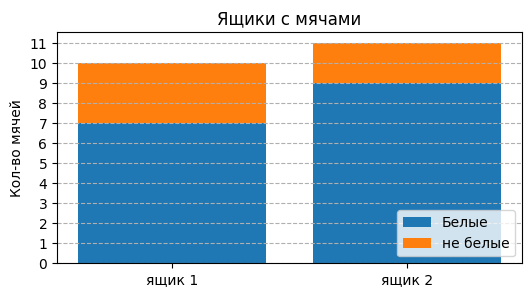

In [15]:

from ctypes import alignment
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,3))
plt.bar(df.index,df['white'] )
plt.bar(df.index,df['non-white'],bottom=df['white'] )
plt.title("Ящики с мячами")
plt.ylabel("Кол-во мячей")
plt.legend(['Белые','не белые'],loc="lower right")
plt.grid(visible=True,axis="y", linestyle="--")
plt.yticks(np.arange(df.sum(axis=1).max()+1, step=1));

Для начала, найдем общую вероятность вытащить только один белый мяч при таком вытаскивании через относительную частоту:  
$P(белый) = P(\text{ровно один белый первого ящика})+P(\text{ровно один белый второго ящика}) = $  
$=P(б1)*P(ч1|б1)+P(ч1)*P(б1|ч1)+P(б2)*P(ч2|б2)+P(ч2)*P(б2|ч2)=$  
$=\frac{7}{10}*(1-\frac{6}{9})+\frac{3}{10}*(\frac{6}{9})+\frac{9}{11}*(1-\frac{8}{10})+\frac{2}{11}*(\frac{8}{10})=0.233+0.2+0.164+0.145=0.742$

In [16]:
P_white= (7/10)*(1-(6/9))+(9/11)*(1-(8/10))+ (3/10)*(6/9)+(2/11)*(8/10)
print(P_white)


0.7424242424242424


Полученную вероятность уже можно использовать в формуле Бернулли , как среднестатистическую.
Нам нужно будет найти вероятности для $n=4, p=0.742$, а $k = 0,2,4$ 

 Вероятность, что ровно 2 мяча белые  
$ P_{4}(X=2)=C^{2}_{4}*0.742^{2}*0.258^{2}= 6*0.550564*0.066564=0.2199$  
Вероятность, что __все__ мячи белые  
$ P_{4}(X=4)=C^{4}_{4}*0.742^{4}*0.258^{0}= 1*0.303*1=0.303$  
Вероятность, что хотя бы 1 мяч белый  
$ P_{4}(X=0)=C^{0}_{4}*0.742^{0}*0.258^{4}= 1*1*0.00443=0.00443$  
$ P(>=1)=1-P_{4}(X=0)=0.9956$  

То же самое через расчет в Питоне:

In [17]:
P_list= []
prob=0.742
tries = 4
temp_prob = 0
for i in range(0,tries+1):
    temp_prob=Bernulli_spread(tries,i,prob)
    P_list.append(temp_prob)
    print(f" вероятность для k={i} белых мячей = {temp_prob:.4f}")
P_atleast1=sum(P_list[1:5])
print(f"Вероятность хотя бы одного белого мяча = {P_atleast1:.4f}")

 вероятность для k=0 белых мячей = 0.0044
 вероятность для k=1 белых мячей = 0.0510
 вероятность для k=2 белых мячей = 0.2199
 вероятность для k=3 белых мячей = 0.4216
 вероятность для k=4 белых мячей = 0.3031
Вероятность хотя бы одного белого мяча = 0.9956


Проверим последний вариант с 4-мя мячами через относительную частоту:

In [18]:
P4 = (7/10)*(6/9)*(9/11)*(8/10)
P4

0.3054545454545454

Получилось близко, $\approx 30 \%$ 

In [19]:
P_white2=C(7,1)*C(3,1)/C(10,2)+C(9,1)*C(2,1)/C(11,2)
P_white2

0.793939393939394

Попробуем только через сочетания:

**Вероятность ровно 2 белых :**  
$$P(2)=\frac{C(2 белых)*C(2 черных)}{C(4любых)}=\frac{C^{2}_{16}*C^{2}_{5}}{C^4_{21}}=\frac{120*10}{5985}=0.2$$

In [20]:
C2_16=C(16,2)
# print(C2_16)
C2_5=C(5,2)
# print(C2_5)
C4_21=C(21,4)
# print(C4_21)
P2=C2_16*C2_5/C4_21
print(P2)

0.20050125313283207


**Вероятность ровно всех 4 белых :**  
$$P(4)=\frac{C(4 белых)}{C(4любых)}=\frac{C^{4}_{16}}{C^4_{21}}=\frac{1820}{5985}=0.304$$

In [21]:
C4_16=C(16,4)
# print(C4_16)
P4=C4_16/C4_21
P4

0.30409356725146197

**Хотя бы 1 белый** это вероятность обратная вероятности всех черных.  
$$P(\geq 1)=1-\frac{C(4 черных)}{C(4любых)}=1-\frac{C^{4}_{5}}{C^4_{21}}=1-\frac{5}{5985}=0.9991$$

In [22]:
C4_5=C(5,4)
# print(C4_5)
P_more1= 1- C4_5/C4_21
P_more1

0.9991645781119465